## Data Science Mini Project
### Visualization and Analysis of the Songs, Artist on the Spotify and Youtube Platform

Dataset of songs of various artist in the world and for each song is present:

Several statistics of the music version on spotify, including the number of streams;
Number of views of the official music video of the song on youtube.

In this notebook we are going to analyze the data deeply and try to get some useful insights like **top artists,trending music** etc


## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


### Load Dataset

In [2]:
df = pd.read_csv("./Spotify_Youtube.csv")

In [3]:
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

#### Based on the above data, the following observations can be made:

- The dataset contains 27 columns.
- The number of data points in the dataset is 20,718
- Some columns contain null values.
- Data has 2 datatypes i.e float and object

In [6]:
df.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

#### Handling missing values

- Filling NA in likes with 0
- Filling NA in comments with 0
- Dropping other 

In [7]:
df['Likes'] = df['Likes'].fillna(0)
df['Comments'] = df['Comments'].fillna(0)
df.dropna(inplace=True)

In [8]:
df.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000,19298.000000,1.929800e+04,1.929800e+04,1.929800e+04,1.929800e+04,1.929800e+04
mean,10426.426365,0.621054,0.635808,5.292103,-7.622436,0.094717,0.288219,0.055655,0.191213,0.528307,120.580877,2.247218e+05,9.683675e+07,6.799624e+05,2.822475e+04,1.381404e+08
std,5984.350044,0.165511,0.213567,3.579583,4.618275,0.104731,0.285900,0.193055,0.165146,0.245251,29.572995,1.275723e+05,2.791808e+08,1.815996e+06,1.971631e+05,2.474362e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.600000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,5238.250000,0.520000,0.510000,2.000000,-8.756000,0.035700,0.043600,0.000000,0.094025,0.338000,96.997500,1.802432e+05,2.066310e+06,2.395475e+04,5.580000e+02,1.784301e+07
50%,10481.500000,0.639000,0.667000,5.000000,-6.506000,0.050500,0.188000,0.000002,0.125000,0.535000,119.965000,2.133575e+05,1.558484e+07,1.317370e+05,3.456500e+03,5.026902e+07
75%,15623.750000,0.742000,0.797000,8.000000,-4.922000,0.103750,0.469000,0.000442,0.234000,0.724750,139.940500,2.519268e+05,7.340811e+07,5.394230e+05,1.478250e+04,1.407806e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


### Exploring Album type

In [9]:
album_type_count = df['Album_type'].value_counts()
print(album_type_count)

Album_type
album          13952
single          4653
compilation      693
Name: count, dtype: int64


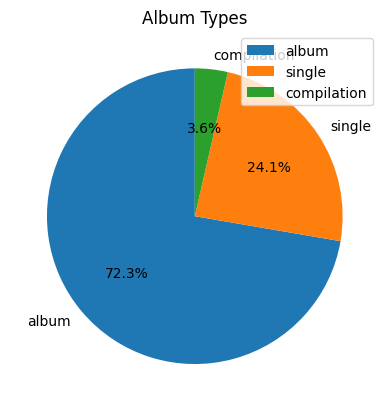

In [10]:
# Create a pie chart
labels = album_type_count.index.tolist()
sizes = album_type_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Album Types')
plt.legend(labels, loc='best')

plt.show()

#### From the above pie chat we can make the following conclusions

**Album type is the most popular: The data shows that the album type has a significantly higher number of views compared to the other types (compilation and single).**

**Singles are more popular than compilations: Although albums are the most popular, the data also shows that singles generate more views compared to compilations. This could indicate that listeners prefer individual songs rather than compilations of songs by different artists.**

In [11]:
data <- read.csv("Spotify_Youtube.csv")
plot(Danceability ~ Energy,data=data)
abline(lm(Danceability ~ Energy,data=data),col='red')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2049961530.py, line 2)

### Analyzing songs by artist and views - youtube, stream - spotify

In [ ]:
# Group the songs by artist and views - youtube, stream - spotify
artist_grouped = df.groupby('Artist')[['Views', 'Stream']].sum()

# Sort the artists by the sum of views and streams in descending order
artist_sorted = artist_grouped.sort_values(['Views', 'Stream'], ascending=False)

# Get the top 10 artists with the most number of views on YouTube and streams on Spotify
top_10 = artist_sorted.head(10)

top_10

,Views,Stream
Artist,,
Ed Sheeran,1.546021e+10,1.439488e+10
CoComelon,1.460167e+10,3.690822e+08
Katy Perry,1.312063e+10,6.607329e+09
Charlie Puth,1.216759e+10,7.041187e+09
Luis Fonsi,1.162811e+10,5.054326e+09
Justin Bieber,1.099079e+10,1.012190e+10
Daddy Yankee,1.086828e+10,4.937464e+09
Bruno Mars,1.023184e+10,9.963335e+09
Macklemore & Ryan Lewis,1.012206e+10,3.982978e+09


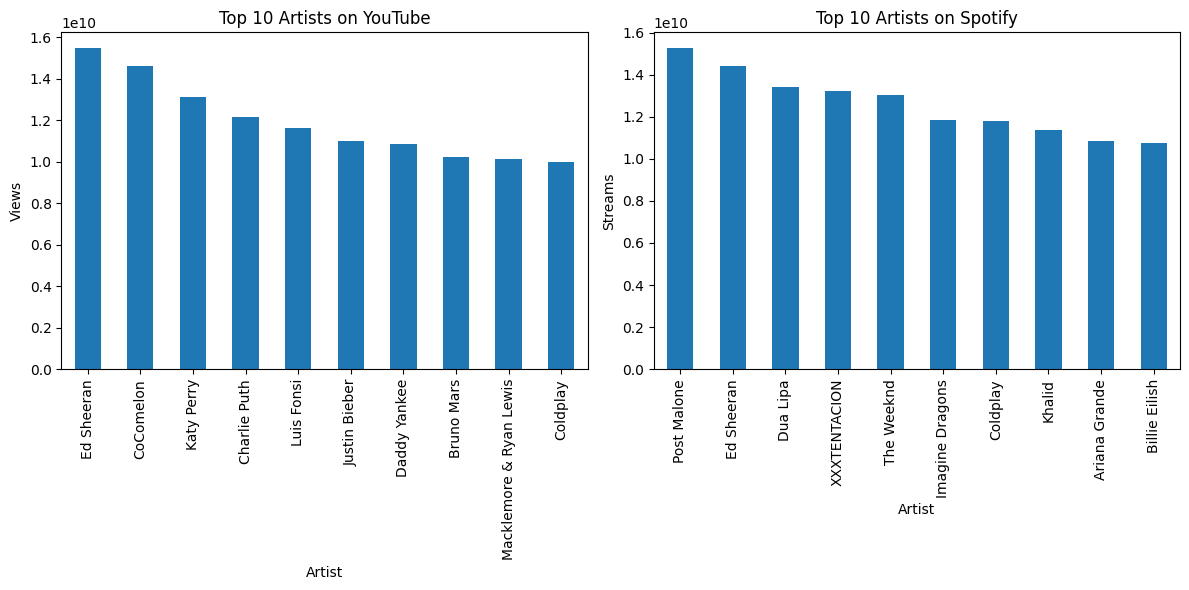

In [ ]:
# Create two separate DataFrames for views and streams
df_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False)[:10]
df_streams = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False)[:10]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# top 10 yt
ax1.set_title('Top 10 Artists on YouTube')
df_views.plot(kind='bar', ax=ax1)

# top 10 spotofy
ax2.set_title('Top 10 Artists on Spotify')
df_streams.plot(kind='bar', ax=ax2)

ax1.set_xlabel('Artist')
ax1.set_ylabel('Views')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Streams')
fig.tight_layout()
plt.show()

**Ed Sheeran was the most viewed artist, with 15 billion views on youtube. CoComelon and Katy Perry are the second and third most viewed artists with 14 billion and 13 billion views, respectively. Charlie Puth and Luis Fonsi complete the top five artists with 12 billion and 11 billion views, respectively.**

**While on Spotify Post Malone was the most streamed artist, with 15 billion.Next Ed Shreeran is streamed about 14 billion. Dua Lipa and XXXTENTACION are the third and fourth most streamed artists with 13.5 billion and 13 billion, respectively. Yhe Weeknd is on fifth place by 13 billion streams.**

**These figures highlight the popularity of these artists and their music on the different online platforms.**

### Analyzing Top 10 songs on the basis of views, comments and like

In [ ]:
# Top 10 songs based on views
top10_views = df.nlargest(10, 'Views')

# Top 10 songs based on comments
top10_comments = df.nlargest(10, 'Comments')

# Top 10 songs based on likes
top10_likes = df.nlargest(10, 'Likes')

/media/shiva/CAB024F1B024E5A31/Personal Project/dataScience/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/shiva/CAB024F1B024E5A31/Personal Project/dataScience/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/shiva/CAB024F1B024E5A31/Personal Project/dataScience/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/shiva/CAB024F1B024E5A31/Personal Project/dataScience/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/media/shiva/CAB

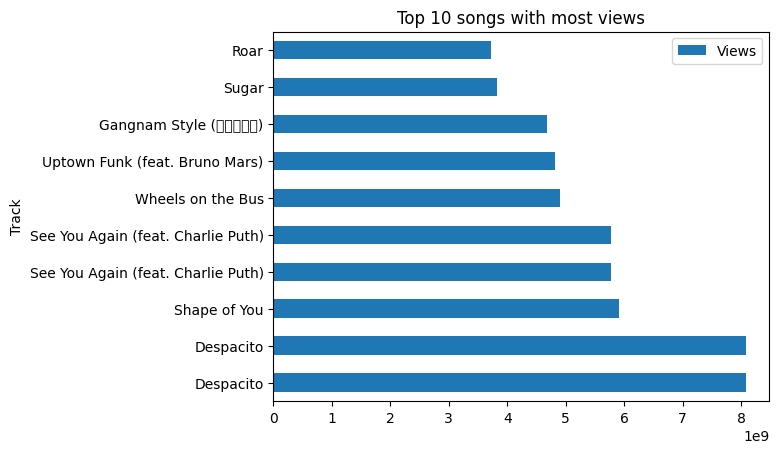

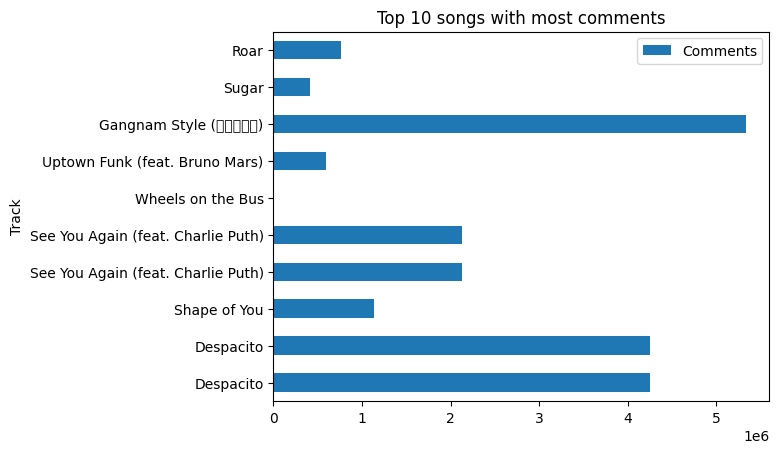

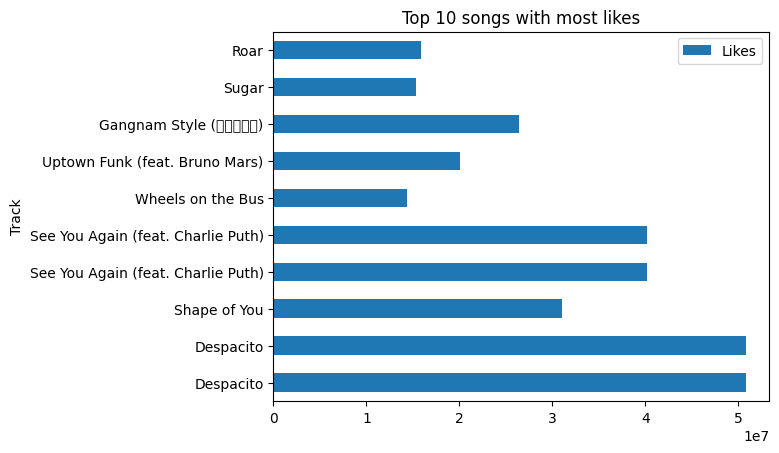

In [ ]:
# Top 10 songs with most views
top10_views.plot(kind='barh', x='Track', y='Views', title='Top 10 songs with most views')

# Top 10 songs with most comments
top10_views.plot(kind='barh', x='Track', y='Comments', title='Top 10 songs with most comments')

# Top 10 songs with most likes
top10_views.plot(kind='barh', x='Track', y='Likes', title='Top 10 songs with most likes')
plt.show()

**As we can see that Despacito is the most liked, viewed and commented music and is popular among 80 million people and 50 million people liked it.Then Shape of you is next by 30 million likes.**

#### Analyzing songs on the basis of Energy and Danceability

In [ ]:
top_songs = df.sort_values('Stream', ascending=False).head(10)
top_songs[['Track', 'Energy', 'Danceability', 'Acousticness']]

,Track,Energy,Danceability,Acousticness
15250,Blinding Lights,0.730,0.514,0.00146
12452,Shape of You,0.652,0.825,0.58100
19186,Someone You Loved,0.405,0.501,0.75100
17937,rockstar (feat. 21 Savage),0.520,0.585,0.12400
17445,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
17938,Sunflower - Spider-Man: Into the Spider-Verse,0.522,0.755,0.53300
13503,One Dance,0.625,0.792,0.00776
16099,Closer,0.524,0.748,0.41400
16028,Closer,0.524,0.748,0.41400
14030,Believer,0.780,0.776,0.06220


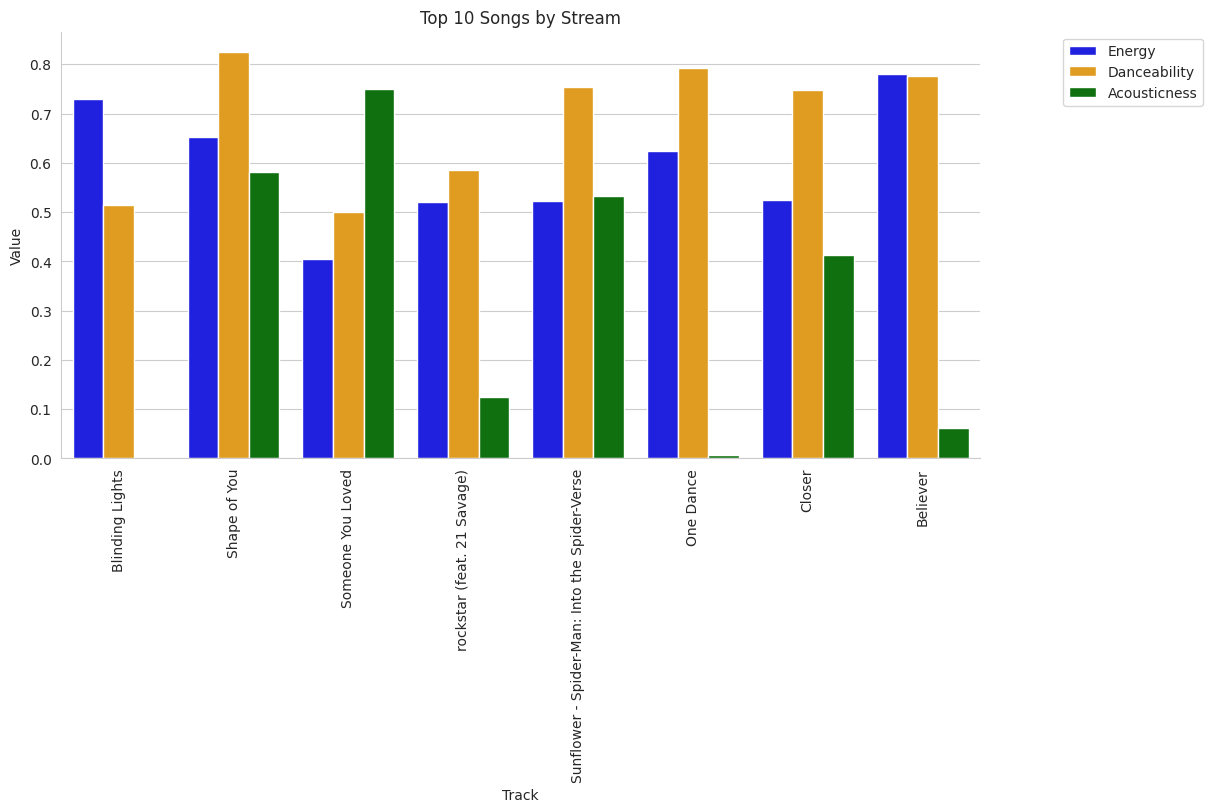

In [ ]:
top_songs_melt = top_songs.melt(id_vars=['Track'], value_vars=['Energy', 'Danceability', 'Acousticness'],
                                var_name='Attribute', value_name='Value')

sns.set_style('whitegrid')
sns.catplot(x='Track', y='Value', hue='Attribute', data=top_songs_melt, kind='bar',
            palette={'Energy': 'blue', 'Danceability': 'orange', 'Acousticness': 'green'},
            aspect=2, legend=False)


plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.title('Top 10 Songs by Stream')
plt.xlabel('Track')
plt.ylabel('Value')

plt.xticks(rotation=90)
plt.show()

**Songs with dance beats and high energy are more popular among people**

### Determining the top 10 artists on the Spotify platform whose songs have more likes.

In [ ]:
#Making the column "Artist" as the index
df_artist = df.set_index("Artist")
df_artist = df_artist[["Danceability","Views","Likes","Album_type"]]

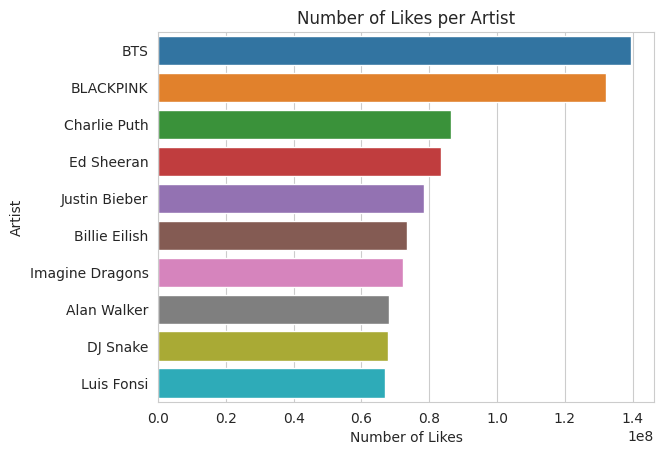

In [ ]:
# Group the data by artist and calculate the mean danceability score
df_artist_grouped = df_artist.groupby('Artist')['Likes'].sum().reset_index()
# Sort the dataframe by danceability score in descending order
df_artist_sorted = df_artist_grouped.sort_values(by='Likes', ascending=False)
# Select the top 10 artists with the highest danceability scores
top_10_artists = df_artist_sorted.head(10)
# Create a horizontal bar plot using seaborn
sns.barplot(x='Likes', y='Artist', data=top_10_artists)
# Set the axis labels and title
plt.xlabel('Number of Likes')
plt.ylabel('Artist')
plt.title('Number of Likes per Artist')
# Show the plot
plt.show()

**BTS and Blackpink are the most popular artist**

### Exploring Single Releases by Artists: Identifying Top Performers Based on Likes

In [ ]:
# filter the data to select only singles
singles = df[df["Album_type"] == "single"]
# group the data by artist and calculate the total views and likes
grouped = singles.groupby("Artist").agg({"Views": "sum", "Likes": "sum"})
# sort the data based on likes and select the top 3 artists
top_10_artists = grouped.sort_values("Likes", ascending=False).head(10)
print(top_10_artists)

                       Views       Likes
Artist                                  
BLACKPINK       7.329516e+09  82959030.0
Wiz Khalifa     6.761550e+09  47790517.0
Charlie Puth    5.870179e+09  41746947.0
Jubin Nautiyal  4.525859e+09  39238542.0
Lil Nas X       3.031660e+09  39103751.0
Marshmello      2.927575e+09  35843277.0
Billie Eilish   2.435116e+09  35590580.0
Bizarrap        1.719856e+09  33922836.0
Ozuna           5.296919e+09  33337259.0
Tanishk Bagchi  3.774839e+09  33190629.0


**BLACKPINK was the most viewed and most liked artist, with 7.3 billion views and over 82 million likes. Wiz Khalifa and Charlie Puth are the second and third most viewed artists with 6.8 billion and 5.9 billion views, respectively. Jubin Nautiyal and Lil Nas X complete the top five artists with 4.5 billion and 3 billion views, respectively. Marshmello, Billie Eilish, and Bizarrap occupy positions six to eight, with 2.9 billion, 2.4 billion, and 1.7 billion views, respectively.These figures highlight the popularity of these artists and their music, as well as the significant role of online video platforms in promoting and distributing music.**

### Exploring compilation Releases by Artists: Identifying Top Performers Based on Likes

In [ ]:
# filter the data to select only singles
singles = df[df["Album_type"] == "compilation"]
# group the data by artist and calculate the total views and likes
grouped = singles.groupby("Artist").agg({"Views": "sum", "Likes": "sum"})
# sort the data based on likes and select the top 3 artists
top_10_artists = grouped.sort_values("Likes", ascending=False).head(10)
print(top_10_artists)

                           Views       Likes
Artist                                      
Shakira             3.463816e+09  20327883.0
Ellie Goulding      2.283748e+09  12418131.0
Dove Cameron        1.791463e+09  12002533.0
Earth, Wind & Fire  1.282815e+09   9609744.0
Idina Menzel        1.876739e+09   9018477.0
DJ Luian            1.586162e+09   8457661.0
Mambo Kingz         1.586162e+09   8457653.0
PSY                 1.539136e+09   8084738.0
Annie Lennox        8.638141e+08   7282923.0
Prince Royce        1.411704e+09   7120861.0


**In compilation ablum type Shakira is most viewed artist followed by Ellie Goulding and Dove Cameron**

### Identifying the top 10 channels based on views

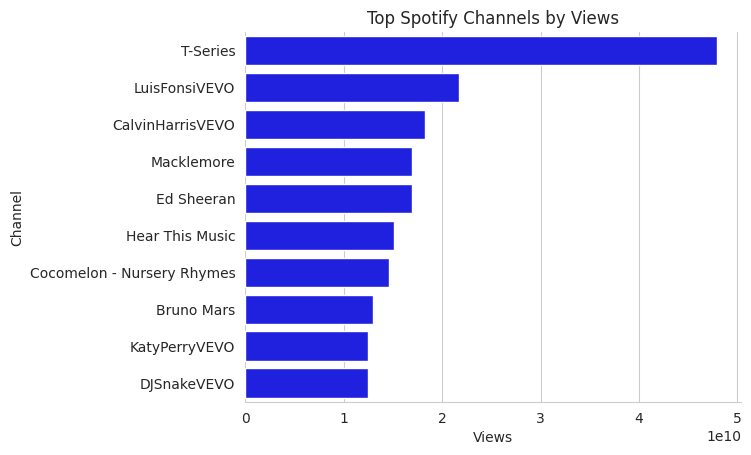

In [ ]:
df_channels = df.groupby("Channel")["Views"].sum().reset_index()
df_sort_channels = df_channels.sort_values("Views", ascending=False).head(10)
sns.set_style("whitegrid")
sns.barplot(x="Views", y="Channel", data=df_sort_channels, color='b')
sns.despine(left=True)
plt.title('Top Spotify Channels by Views')
plt.xlabel('Views')
plt.ylabel('Channel')
plt.show()

**T-Series is most popular channel with 50 billion views.LuisFonsiVEVO, CalvinHarrisVEVO, Macklemore and Ed Shreean are also part of top 5.**